#### Import modules and read data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = pd.read_excel(os.getcwd() + '/Data/Superstore.xls')
data.shape

(9994, 21)

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

#### EDA and Preprocessing

In [5]:
data['Prep Time'] = data['Ship Date'] - data['Order Date']  # number of days between order placement and shipping

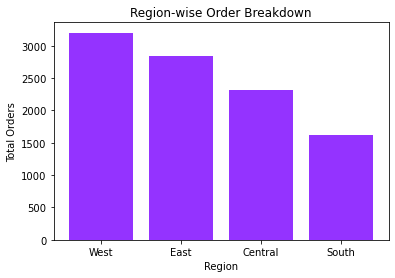

In [6]:
region_counts = data['Region'].value_counts()

plt.bar(region_counts.index, region_counts, color = '#9433ff')
plt.title('Region-wise Order Breakdown')
plt.xlabel('Region')
plt.ylabel('Total Orders')
plt.show()
plt.close()

In [7]:
# data['Sub-Category'].value_counts()

In [8]:
data.groupby(['Category', 'Sub-Category']).size()

Category         Sub-Category
Furniture        Bookcases        228
                 Chairs           617
                 Furnishings      957
                 Tables           319
Office Supplies  Appliances       466
                 Art              796
                 Binders         1523
                 Envelopes        254
                 Fasteners        217
                 Labels           364
                 Paper           1370
                 Storage          846
                 Supplies         190
Technology       Accessories      775
                 Copiers           68
                 Machines         115
                 Phones           889
dtype: int64

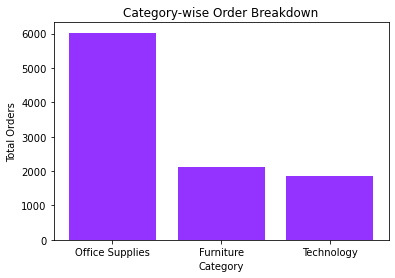

In [9]:
cat_counts = data['Category'].value_counts()

plt.bar(cat_counts.index, cat_counts, color = '#9433ff')
plt.title('Category-wise Order Breakdown')
plt.xlabel('Category')
plt.ylabel('Total Orders')
plt.show()
plt.close()

In [10]:
cat_region_orders = data.groupby(['Category', 'Region']).size()  # category + region order counts
cat_region_orders

Category         Region 
Furniture        Central     481
                 East        601
                 South       332
                 West        707
Office Supplies  Central    1422
                 East       1712
                 South       995
                 West       1897
Technology       Central     420
                 East        535
                 South       293
                 West        599
dtype: int64

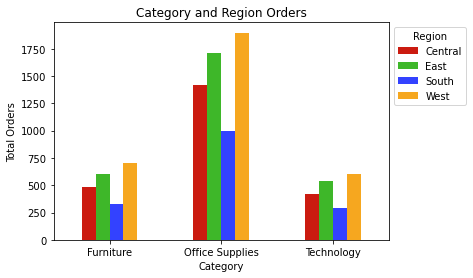

In [11]:
cat_region_orders.unstack().plot(kind = 'bar', color = ['#cb1b10', '#3eb729', '#3342ff', '#f6a71f'])
plt.title('Category and Region Orders')
plt.ylabel('Total Orders')
plt.xticks(rotation = 0)
plt.legend(loc = 2, bbox_to_anchor = (1, 1), title = 'Region')
plt.show()
plt.close()

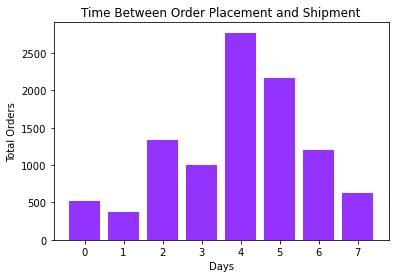

In [12]:
prep_counts = data['Prep Time'].value_counts()

plt.bar(prep_counts.reset_index()['index'].dt.total_seconds() / 86400, prep_counts, color = '#9433ff')  # resets index, converts col from days as a timedelta to seconds as a float, then divide to get number of days
plt.title('Time Between Order Placement and Shipment')
plt.xlabel('Days')
plt.ylabel('Total Orders')
plt.show()
plt.close()

In [13]:
data.groupby(['Region', 'Category', 'Prep Time']).size()

Region   Category    Prep Time
Central  Furniture   0 days        27
                     1 days        13
                     2 days        63
                     3 days        35
                     4 days       157
                                 ... 
West     Technology  3 days        59
                     4 days       151
                     5 days       124
                     6 days        72
                     7 days        48
Length: 96, dtype: int64

In [14]:
data.groupby(['Category', 'Prep Time']).size()

Category         Prep Time
Furniture        0 days        116
                 1 days         77
                 2 days        310
                 3 days        186
                 4 days        601
                 5 days        466
                 6 days        236
                 7 days        129
Office Supplies  0 days        310
                 1 days        221
                 2 days        765
                 3 days        627
                 4 days       1660
                 5 days       1310
                 6 days        749
                 7 days        384
Technology       0 days         93
                 1 days         71
                 2 days        259
                 3 days        192
                 4 days        513
                 5 days        393
                 6 days        218
                 7 days        108
dtype: int64

In [15]:
data.describe().iloc[:, 2 :]

,Sales,Quantity,Discount,Profit,Prep Time
count,9994.000000,9994.000000,9994.000000,9994.000000,9994
mean,229.858001,3.789574,0.156203,28.656896,3 days 22:59:46.311787
std,623.245101,2.225110,0.206452,234.260108,1 days 17:56:29.766161
min,0.444000,1.000000,0.000000,-6599.978000,0 days 00:00:00
25%,17.280000,2.000000,0.000000,1.728750,3 days 00:00:00
50%,54.490000,3.000000,0.200000,8.666500,4 days 00:00:00
75%,209.940000,5.000000,0.200000,29.364000,5 days 00:00:00
max,22638.480000,14.000000,0.800000,8399.976000,7 days 00:00:00


#### Subset Data

In [16]:
df = data.loc[data['Category'] == 'Furniture']

df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [17]:
df = df.sort_values(by = 'Order Date').set_index('Order Date')
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Prep Time
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-01-06,7475,CA-2014-167199,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,Kentucky,...,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078,4 days
2014-01-07,7661,CA-2014-105417,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,...,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096,5 days
2014-01-10,867,CA-2014-149020,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,Virginia,...,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954,5 days
2014-01-11,717,CA-2014-130092,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,Delaware,...,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814,3 days
2014-01-13,2979,CA-2014-109232,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,South Carolina,...,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504,3 days


#### Resample Data

In [18]:
month_s = df['Sales'].resample('MS').mean()  # average sales for each month

month_s['2017']

Order Date
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    206.044502
2017-05-01    319.953928
2017-06-01    372.717386
2017-07-01    227.173500
2017-08-01    395.945487
2017-09-01    349.737422
2017-10-01    308.226313
2017-11-01    374.310253
2017-12-01    296.296857
Freq: MS, Name: Sales, dtype: float64

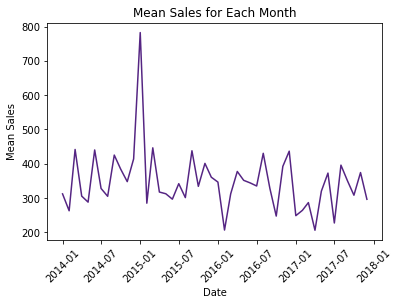

In [19]:
plt.plot(month_s.index, month_s, color = '#552583')
plt.title('Mean Sales for Each Month')
plt.xlabel('Date')
plt.ylabel('Mean Sales')
plt.xticks(rotation = 45)
plt.show()
plt.close()

#### Decompose Data

In [21]:
decomposition = sm.tsa.seasonal_decompose(month_s, model = 'additive')

In [31]:
# decomposition.resid
# decomposition.seasonal
# decomposition.trend
# decomposition.observed  # equilvalent to month_s

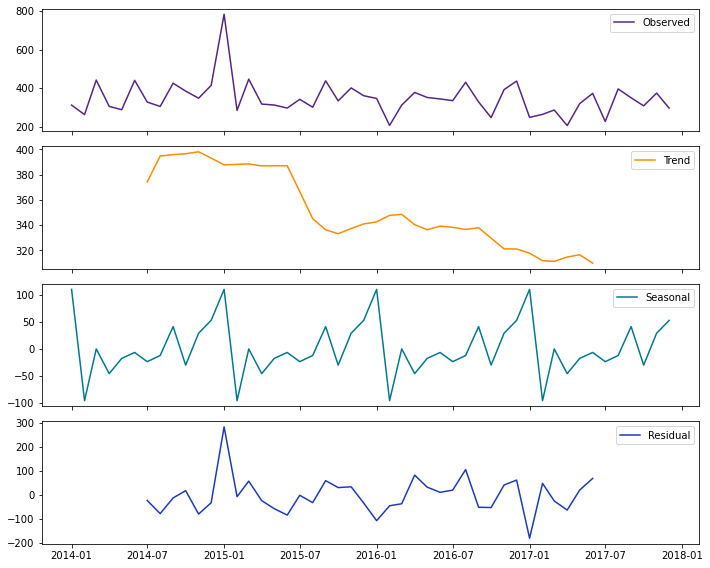

In [43]:
fig, ax = plt.subplots(4, 1, figsize = (10, 8), sharex = True)

ax[0].plot(decomposition.observed.index, decomposition.observed, color = '#552583')
ax[0].legend(['Observed'])

ax[1].plot(decomposition.trend.index, decomposition.trend, color = '#ff8b00', label = 'Trend')
ax[1].legend(['Trend'])

ax[2].plot(decomposition.seasonal.index, decomposition.seasonal, color = '#00788c', label = 'Seasonal')
ax[2].legend(['Seasonal'])

ax[3].plot(decomposition.resid.index, decomposition.resid, color = '#1c39bb', label = 'Residual')
ax[3].legend(['Residual'])

fig.tight_layout(h_pad = 1)
plt.show()
plt.close()